In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import csv

x=[]
y=[]
with open('foo1.txt') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            xx = float(row[0])
            yy = float(row[1])
            p =[xx]
            q =[yy]
            x.append(p)
            y.append(q)
                        
x=np.array(x)
y=np.array(y)
n = len(x)

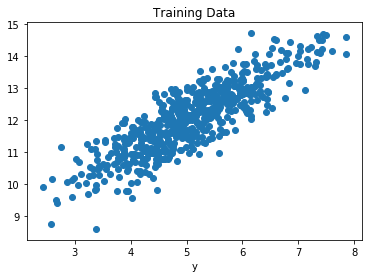

In [5]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [6]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

In [7]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 
#W = [45,21,32,45,4,32,4,10,30,55]
#b = [24,33,45,65,78,25,12,32,52,32]

In [8]:
learning_rate_Array = [0.1,0.2,0.12,0.123,0.654,0.5,0.015,0.065,0.951,0.1111]
print(learning_rate_Array[9])
training_epochs = 1000
learning_rate = 0.1

0.1111


In [11]:
# Hypothesis 
y_predArr = []
cost_Arr = []
cost = []
#for i in range (0,10):
y_pred = tf.add(tf.multiply(X, W), b) 
#y_predArr.append(y_pred)
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
   # cost_Arr.append(cost)

optimizerArr = []

#np.array(optimizer)

# Gradient Descent Optimizer 
for i in range (0,10):
    print(learning_rate_Array[i])
    optimizer = tf.train.GradientDescentOptimizer(learning_rate_Array[i]).minimize(cost) 
    optimizerArr.append(optimizer)
#print(optimizer)
        

# Global Variables Initializer 
init = tf.global_variables_initializer() 


0.1
0.2
0.12
0.123
0.654
0.5
0.015
0.065
0.951
0.1111


In [ ]:
# Starting the Tensorflow Session 
for i in range (0,10):
    with tf.Session() as sess: 
        costArr = []
        epochArr = []
    # Initializing the Variables 
        sess.run(init) 
    
    # Iterating through all the epochs 
        for epoch in range(training_epochs): 
        
        # Feeding each data point into the optimizer using Feed Dictionary 
            for (_x, _y) in zip(x, y): 
                sess.run(optimizerArr[i], feed_dict = {X : _x, Y : _y})        
            
        # Displaying the result after every 50 epochs 
        #if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
                c = sess.run(cost, feed_dict = {X : x, Y : y}) 
                costArr.append(c)
                epochArr.append(epoch)
                diff = costArr[epoch] - costArr[epoch - 1]
                #if diff < 0.001:
                #    print("These iterations are enough!!")
                #    break;
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
    
    # Storing necessary values to be used outside the Session 
        plt.plot(costArr,epochArr,'o')
        training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
        weight = sess.run(W) 
        bias = sess.run(b) 



In [ ]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


In [ ]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
